### Previsão da Qualidade do Vinho – Análise e Classificação
Análise do conjunto de dados Wine Quality e construção de modelo preditivo
![Descrição opcional](https://raw.githubusercontent.com/Masterx-AI/Project_Wine_Quality_Investigation/main/wq.jpg)

### Introdução
Este projeto utiliza o conjunto de dados **Wine Quality**, que contém informações físico-químicas de vinhos tintos da variedade portuguesa "Vinho Verde".  
O objetivo é prever a **qualidade do vinho** com base em suas características químicas, utilizando técnicas de **classificação**.  
**Link:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

### Sobre o Dataset
- Origem: Kaggle e UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/wine+quality  
- Tipo: Dados físico-químicos de vinhos tintos da região Vinho Verde (Portugal)  
- Tarefa: Pode ser abordada como **classificação** ou **regressão**  
- Observação: As classes são ordenadas e **desbalanceadas** (há mais vinhos normais do que excelentes ou ruins)  
- Desafio: Poucas amostras e alta desproporção entre classes  

### Variáveis:
**Entradas (testes físico-químicos):**
1. fixed acidity  
2. volatile acidity  
3. citric acid  
4. residual sugar  
5. chlorides  
6. free sulfur dioxide  
7. total sulfur dioxide  
8. density  
9. pH  
10. sulphates  
11. alcohol
    
**Saída (dados sensoriais):**  
12. quality (nota entre 0 e 10)

### Objetivos
1. Explorar e entender o conjunto de dados
2. Tratar possíveis problemas (normalização, desbalanceamento)
3. Construir e comparar modelos de classificação para prever a qualidade do vinho
4. Avaliar métricas e ajustar hiperparâmetros para melhorar a performance

### Análise Exploratória do Dataset

**Importação das Bibliotecas e Carregamento dos Dados:**

In [30]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import re
import seaborn as sns
#import helper

from scipy.stats import chi2_contingency
from __future__ import division
#from tmcm_feature_engineering import TMCMFeatureEng
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import tree  # ou: from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree  

data = pd.read_csv("C:/Users/julianacampos/Downloads/Python/WineQT.csv")

**Exploração do dataset:**

In [2]:
print("Dimensão:\n", data.shape)  # Linhas e colunas

print("\nColunas:\n", list(data.columns))  # Nome das colunas  

print("\nChecar completude (nulos), tipos de dados e memória:\n")
data.info()

print("\nValores nulos por coluna:\n")  
print(data.isnull().sum())  

print("\nEstatísticas descritivas:\n")  # Visão geral da distribuição dos dados
print(data.describe(include='all'))

Dimensão:
 (1143, 13)

Colunas:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

Checar completude (nulos), tipos de dados e memória:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10 

**Colunas do Dataset**

- **fixed acidity**: acidez fixa *(numérica)*

- **volatile acidity**: acidez volátil *(numérica)*

- **citric acid**: qtd. de ácido cítrico *(numérica)*

- **residual sugar**: qtd. de açúcar residual *(numérica)*  
  *Típico entre 1.9 e 2.6; máx = 15.5 → forte assimetria/outliers*

- **chlorides**: qtd. de cloretos *(numérica)*  
  *Típico 0.07–0.09; máx = 0.611 → outliers claros*

- **free sulfur dioxide**: qtd. de dióxido sulfúrico livre *(numérica)*  
  *Q1–Q3 = [7, 21]; máx = 68 → alguns valores altos*

- **total sulfur dioxide**: qtd. de dióxido sulfúrico total *(numérica)*  
  *Q1–Q3 = [21, 61]; máx = 289 → outliers bem pronunciados*

- **density**: densidade do vinho *(numérica)*  
  *Média ≈ 0.9967; baixa variação (std ≈ 0.0019)*

- **pH**: pH do vinho *(numérica)*

- **sulphates**: qtd. de sulfatos no vinho *(numérica)*

- **alcohol**: qtd. de álcool no vinho *(numérica)*  
  *Média ≈ 10.44%; desvio padrão ≈ 1.08 → variação moderada (não é extremamente dispersa)*

    Quartis (Álcool)
| Métrica   | Valor |
|-----------|-------|
| Q1 (25%)  | 9.5   |
| Mediana   | 10.2  |
| Q3 (75%)  | 11.1  |
| Máximo    | 14.9  |
| Mínimo    | 8.4   |

- **Id**: identificação do vinho
  
---
**`Qualidade (Target)`**
- **quality**: qualidade do vinho *(numérica)*
> **Distribuição concentrada em notas 5–6; poucas amostras com 7–8**  
> *Possível desbalanceamento*

**Detalhes:**
- Mediana = 6; Q1 = 5; Q3 = 6 (intervalo [3, 8])  
- 25% das notas ≤ 5  
- ~50% das notas entre 5 e 6  
- Apenas quartil superior (≥ 25%) pode estar em 7–8
  
---




**Exibição das primeiras linhas do dataset para verificar se as colunas foram carregadas corretamente e se os valores estão coerentes:**

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Cálculo da Densidade de Dados por Coluna:**

In [4]:
def calculate_density(df):
    sparsity_dict = {}
    for col in df.columns:
        sparsity_dict[col] = df[col].count() / df.shape[0]
    return sparsity_dict

density_dict = calculate_density(data)

# Ordena as colunas pela densidade (da menor para a maior)
sorted_density_list = sorted(density_dict.items(), key=lambda x: x[1])

print("\n")
for l in sorted_density_list:
    print("{:25} => Density of {:4.2f}%".format(l[0], l[1]*100))




fixed acidity             => Density of 100.00%
volatile acidity          => Density of 100.00%
citric acid               => Density of 100.00%
residual sugar            => Density of 100.00%
chlorides                 => Density of 100.00%
free sulfur dioxide       => Density of 100.00%
total sulfur dioxide      => Density of 100.00%
density                   => Density of 100.00%
pH                        => Density of 100.00%
sulphates                 => Density of 100.00%
alcohol                   => Density of 100.00%
quality                   => Density of 100.00%
Id                        => Density of 100.00%


Todas as colunas apresentam densidade de 100%, ou seja, não existem valores nulos no dataset

## Explorando a variável target: `quality`

A variável **`quality`** pode assumir valores inteiros entre **0 e 10**. No entanto, no dataset, **não existem exemplos** de vinhos com qualidade entre **0 e 2**, nem com qualidade **10**.

A distribuição da qualidade segue um padrão aproximadamente normal, com maior concentração nos valores **5** e **6** (vinhos medianos) e uma quantidade significativamente menor de vinhos de baixa ou alta qualidade.

Além disso, o número de exemplos com qualidade **3, 4, 8 e 9** é muito pequeno, o que dificulta treinar algoritmos para prever essas classes. Para simplificar o problema, podemos agrupar as classes em duas categorias:

- **Bad**: composta pelas classes **3 a 5**
- **Good**: composta pelas classes **6 a 9**

Essa divisão resulta em uma relação aproximada de **1:2** entre as categoria  
(para cada 1 vinho da categoria Bad, existem 2 vinhos da categoria Good)

**Distribuição da variável quality (Contagem por classe):**

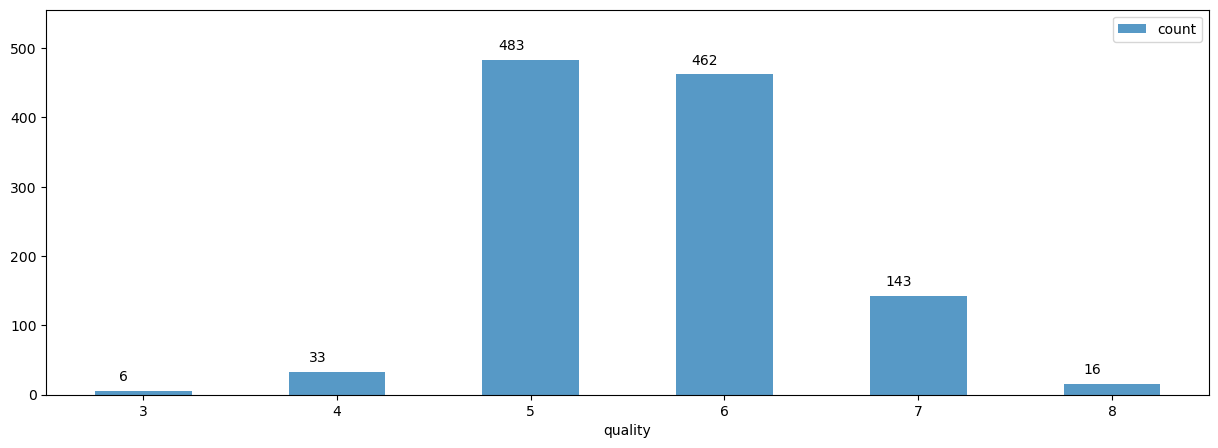

In [5]:
# Agrupar e contar quantas linhas há em cada valor de 'quality'
grouped_df = data.groupby('quality').size().reset_index(name='count')

# Plotar o gráfico de barras
ax = grouped_df.plot.bar(x='quality', y='count', figsize=(15,5), alpha=0.75, rot=0)

# Ajustar o limite do eixo Y
ax.set_ylim(0, grouped_df['count'].max() * 1.15)

# Offsets para posicionar os rótulos
x_offset = -0.1
y_offset = 10

# Adicionar os valores no topo das barras
for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1 - b.y0)  # altura da barra = contagem
    ax.annotate(
        f'{val}',
        ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),
        ha='center', va='bottom'
    )

plt.show()

**Conclusão sobre a distribuição da variável `quality`**

O gráfico mostra a contagem de vinhos por nível de qualidade:

- **Qualidade 3:** 6 vinhos  
- **Qualidade 4:** 33 vinhos  
- **Qualidade 5:** 483 vinhos  
- **Qualidade 6:** 462 vinhos  
- **Qualidade 7:** 143 vinhos  
- **Qualidade 8:** 16 vinhos  

**Principais conclusões:**
1. **Distribuição concentrada nos valores 5 e 6**  
   A maioria dos vinhos possui qualidade mediana, com 483 vinhos na classe 5 e 462 na classe 6

2. **Poucos exemplos nas extremidades**  
   Qualidades 3, 4 e 8 são raras, com menos de 40 registros cada. Isso indica baixa representatividade dessas classes

3. **Classe 7 é intermediária, mas ainda pouco frequente**  
   Com 143 vinhos, é mais comum que as extremidades, mas bem menor que as classes centrais

4. **Impacto para modelagem preditiva**  
   O dataset é **desbalanceado**. Modelos de ML podem ter dificuldade para prever classes raras
   Vamos seguir a abordagem comum de **agrupar as classes** em duas categorias:  
   - **Bad:** 3, 4, 5  
   - **Good:** 6, 7, 8  
   Essa simplificação ajudará a reduzir o problema de desbalanceamento

**Contagem de vinhos por categoria (Bad vs Good):**

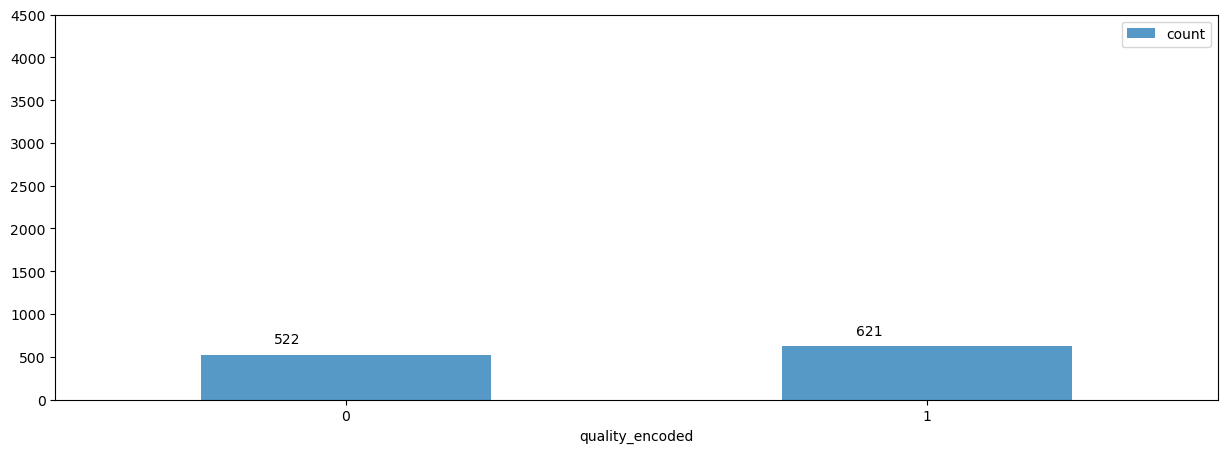

In [6]:
# Criar colunas categórica e numérica
data['quality_updated'] = data['quality'].apply(lambda x: 'Bad' if x < 6 else 'Good')
data['quality_encoded'] = data['quality_updated'].apply(lambda x: 0 if x == 'Bad' else 1)

# Agrupar e contar
grouped_df = data.groupby('quality_encoded').size().reset_index(name='count')

# Plotar gráfico
import matplotlib.pyplot as plt

ax = grouped_df.plot.bar(x='quality_encoded', y='count', figsize=(15,5), alpha=0.75, rot=0, ylim=(0,4500))

# Adicionar rótulos
x_offset = -0.1
y_offset = 100
for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1 - b.y0)
    ax.annotate(f'{val}', ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), ha='center', va='bottom')

plt.show()

## Análise das variáveis

O objetivo é analisar as variáveis numéricas do dataset para identificar:
- **Diferenças de escala**: algumas variáveis têm valores muito pequenos (ex.: `volatile acidity` ~0.1–1.5), enquanto outras são grandes (ex.: `total sulfur dioxide` até 250+)
- **Possíveis outliers**: valores máximos muito acima do percentil 99% indicam caudas longas

Por que isso importa?
- Modelos de Machine Learning podem ser influenciados por variáveis em escalas diferentes
- Outliers podem distorcer métricas e afetar o desempenho

A análise abaixo usa `describe()` com percentis customizados (25%, 50%, 75%, 99%) para ajudar a diagnosticar essas questões. Essa etapa é essencial para decidir se será necessário **normalizar/padronizar** os dados ou aplicar transformações


In [7]:
numeric_cols = ["volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
data[numeric_cols].describe(percentiles=[.25, .5, .75, .99])

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
99%,1.020000,0.730000,8.216000,0.350860,48.000000,143.000000,1.002100,3.695800,1.243200,13.496667
max,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


**Considerações sobre as variáveis (numéricas)**

- As variáveis apresentam **diferenças significativas de escala**:
  - Ex.: `volatile acidity` varia entre 0.12 e 1.58, enquanto `total sulfur dioxide` chega a 289
- Há **indícios de outliers**:
  - Ex.: `total sulfur dioxide` tem p99 = 143, mas máximo = 289
  - `residual sugar` tem p99 = 8.21, mas máximo = 15.5
- Essas discrepâncias indicam que:
  - Será necessário **normalizar/padronizar** as variáveis para evitar que algumas dominem o modelo

**BOXPLOT**

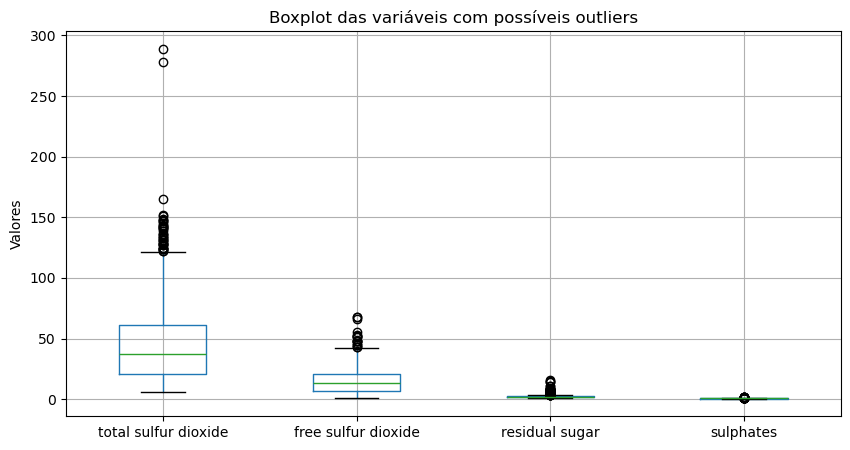

In [8]:
# Selecionar colunas com suspeita de outliers
cols_outliers = ['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'sulphates']

# Criar boxplots lado a lado
plt.figure(figsize=(10, 5))
data[cols_outliers].boxplot()
plt.title('Boxplot das variáveis com possíveis outliers')
plt.ylabel('Valores')
plt.show()


**Conclusão do Boxplot**
O boxplot mostra que:
- **total sulfur dioxide** apresenta muitos outliers, com valores chegando perto de 300, enquanto a maior parte dos dados está abaixo de 100
- **free sulfur dioxide** também possui outliers, mas menos extremos (máximo ~68)
- **residual sugar** tem alguns valores acima de 15, indicando cauda longa
- **sulphates** apresenta poucos outliers e menor variação

**Implicações:**
- Há forte presença de **outliers** em algumas variáveis, especialmente `total sulfur dioxide`

**HISTOGRAMA**

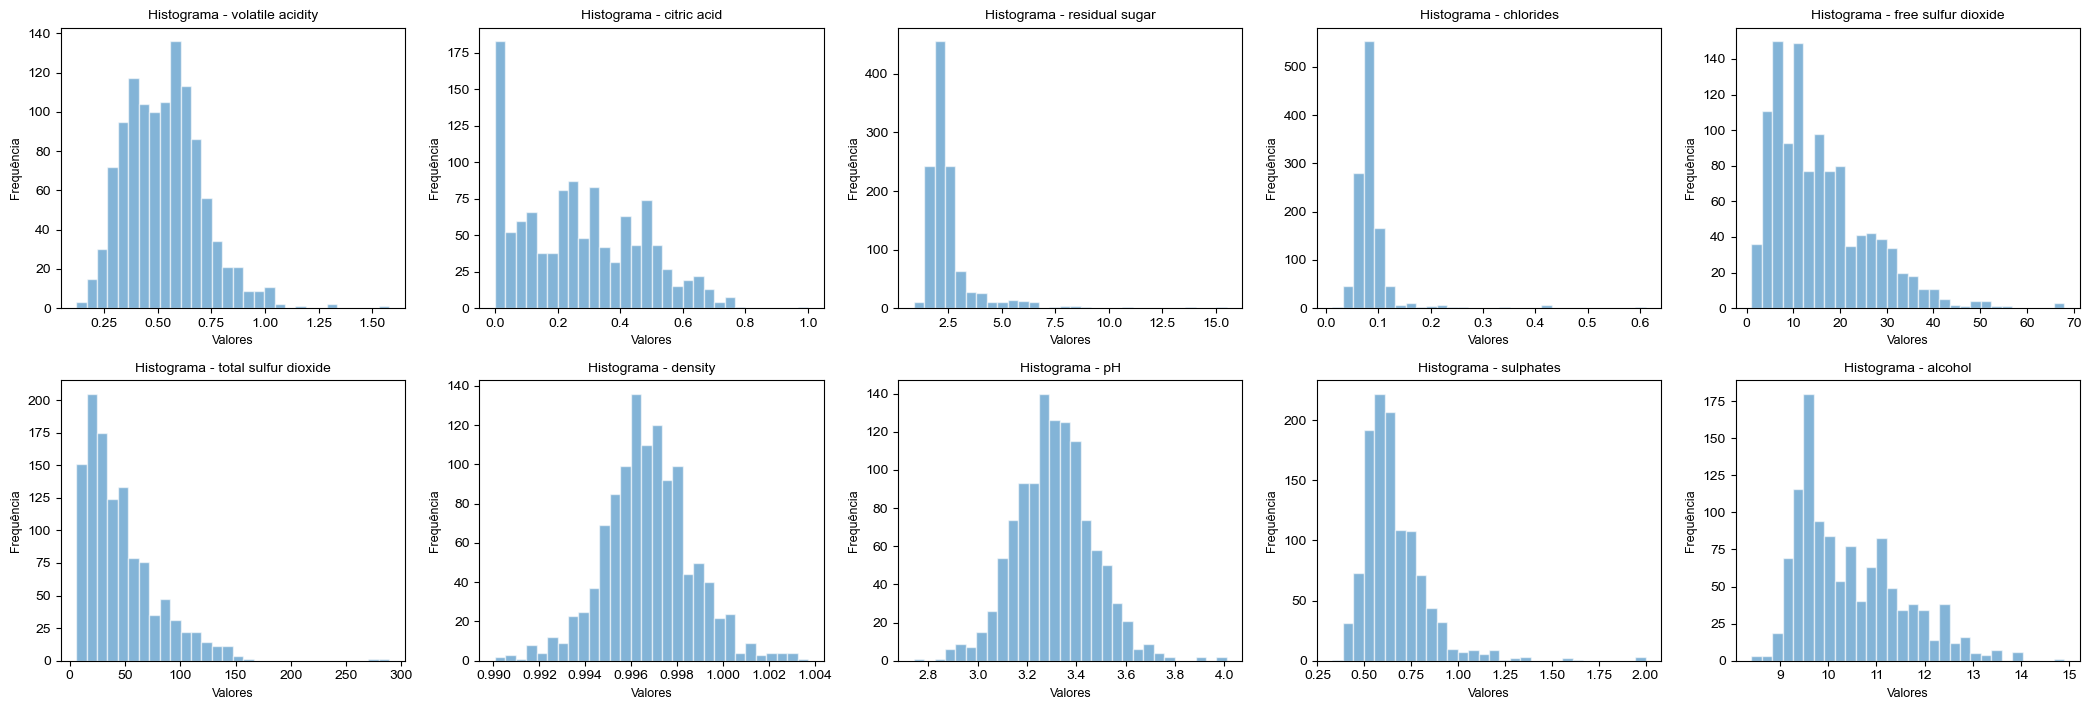

In [9]:
features = ["volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Filtra apenas colunas que existem no DataFrame
available_features = [f for f in features if f in data.columns]

# Define grid dinamicamente (2 linhas x 5 colunas)
n = len(available_features)
rows = 2
cols = int(np.ceil(n / rows))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4.2*cols, 3.6*rows))
axes = np.array(axes).reshape(-1)  # flatten para indexar facilmente

# Estilo opcional
plt.style.use('seaborn-v0_8-whitegrid')

for i, feat in enumerate(available_features):
    ax = axes[i]
    # Remove NaNs e valores negativos se fizer sentido (ex.: densidade, pH não deveriam ser negativos)
    series = data[feat].dropna()

    # Configura número de bins
    bins = 30

    # Plot do histograma
    ax.hist(series, bins=bins, alpha=0.6, color="#3182bd", edgecolor="white")
    ax.set_title(f'Histograma - {feat}', fontsize=10)
    ax.set_xlabel('Valores', fontsize=9)
    ax.set_ylabel('Frequência', fontsize=9)

# Esconde subplots vazios (se n < rows*cols)
for j in range(n, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Considerações sobre os histogramas das variáveis**

**1) Leitura por variável**

- **Volatile acidity**  
  - Distribuição **assimétrica à direita** (right–skewed), com concentração ~0.3–0.8  
  - Há poucos valores altos (possíveis outliers > 1.0)

- **Citric acid**  
  - Distribuição **multimodal** (picos próximos de 0, ~0.25 e ~0.5)  
  - Muitos registros com **zero** (ex.: ausência do componente)
    
- **Residual sugar**  
  - **Forte assimetria à direita**; maioria entre ~1–5 com cauda longa até ~15  

- **Chlorides**  
  - Assimetria à direita e poucos valores > 0.2

- **Free sulfur dioxide**  
  - Assimétrica, cauda até 68

- **Total sulfur dioxide**  
  - Assimetria marcada, cauda até ~300
    
- **Density**  
  - Distribuição **quase normal**, centrada ~0.996–0.998 (baixa variância)

- **pH**  
  - **Aproximadamente normal**, centrada ~3.2–3.3

- **Sulphates**  
  - Assimétrica à direita, poucos valores > 1.5
    
- **Alcohol**  
  - Assimétrica à direita, com cauda até ~14

### **Correlação de Spearman**

**O que é a análise de correlação e por que usar Spearman?**

A correlação mede a **força** e a **direção** da relação entre duas variáveis
- Valores próximos de **+1** → relação positiva forte (uma aumenta quando a outra aumenta)
- Valores próximos de **-1** → relação negativa forte (uma aumenta quando a outra diminui)
- Valores próximos de **0** → pouca ou nenhuma relação

**Por que Spearman (e não Pearson) aqui?**
Com base nos **histogramas** das variáveis (ex.: `residual sugar`, `chlorides`, `free/total sulfur dioxide`, `volatile acidity`):
- Observamos **assimetria à direita (skewness)** e **caudas longas**
- Em alguns casos, **multimodalidade** (ex.: `citric acid`) e **muitos zeros**
- Há **outliers** que podem afetar medidas sensíveis à normalidade

Diante desses sinais, não é razoável assumir **normalidade** nem **linearidade** 
A correlação de **Spearman** é mais apropriada porque:
- Avalia **relações monotônicas** (crescentes ou decrescentes) mesmo quando **não lineares**
- É **robusta** a outliers e a distribuições não normais, pois se baseia em **postos (ranks)**

**Objetivo da análise**
- Identificar quais variáveis numéricas têm maior ou menor relação com `quality`
- Priorizar **features** para modelagem e decidir quais transformar ou possivelmente descartar
- Apoiar decisões de **pré-processamento** (ex.: transformação log em variáveis muito assimétricas)

O resultado é apresentado em um **heatmap** de correlações (Spearman), onde interpretamos:
- **+1**: correlação positiva perfeita,
- **-1**: correlação negativa perfeita,
- **0**: ausência de correlação monotônica

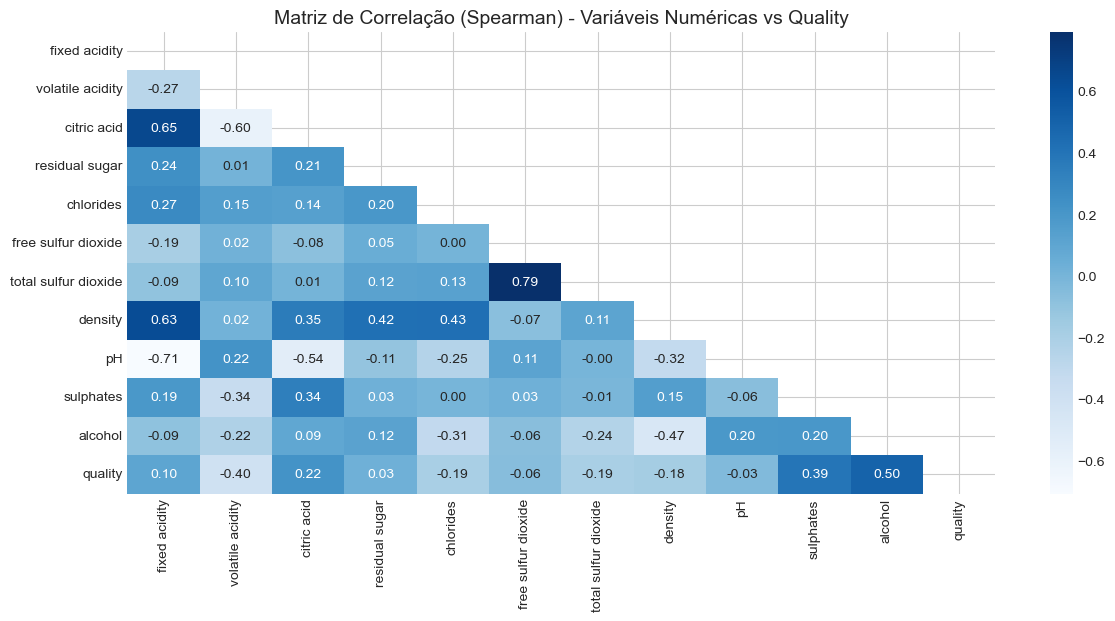

In [10]:
numeric_cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide","density", "pH", "sulphates", "alcohol"]

# Coluna alvo
output_col = ["quality"]

# Calcula a matriz de correlação usando Spearman
corr = data[numeric_cols + output_col].corr(method="spearman")

# Máscara para ocultar a parte superior da matriz (opcional)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot do heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title("Matriz de Correlação (Spearman) - Variáveis Numéricas vs Quality", fontsize=14)
plt.show()

C:\Users\julianacampos\AppData\Local\Temp\ipykernel_13332\1672927516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="Blues_r")


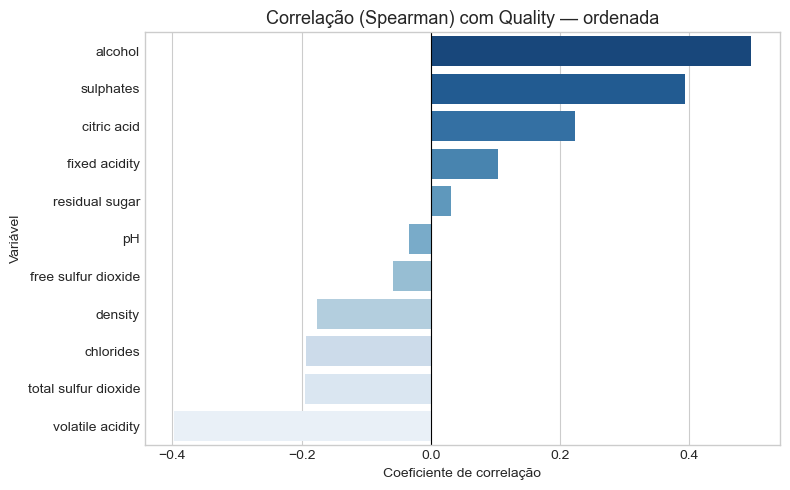

In [11]:
numeric_cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
output_col = ["quality"]

# Correlação Spearman apenas entre features e alvo
corr = data[numeric_cols + output_col].corr(method="spearman")
corr_target = corr.loc[numeric_cols, "quality"].sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="Blues_r")
plt.axvline(0, color="k", linewidth=0.8)
plt.title("Correlação (Spearman) com Quality — ordenada", fontsize=13)
plt.xlabel("Coeficiente de correlação")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

**Considerações sobre a correlação (Spearman) com `quality`**

**1) Principais sinais do gráfico**
- **Correlação positiva mais forte**:
  - **alcohol** → é a variável com maior correlação positiva com `quality`. Em geral, vinhos com maior teor alcoólico tendem a ser avaliados com maior qualidade
  - **sulphates** → também apresenta correlação positiva relevante; costuma estar associado a estabilidade e percepção sensorial
  - **citric acid** → correlação positiva moderada; pode indicar estilo/processo que contribui para qualidade

- **Correlação negativa**:
  - **volatile acidity** → é a **mais negativa**; níveis altos geralmente são percebidos como defeito, reduzindo a qualidade
  - **chlorides** e **density** → correlações negativas moderadas/baixas; valores mais altos tendem a aparecer em vinhos de menor qualidade
  - **total sulfur dioxide** (e em menor grau **free sulfur dioxide**) → correlações fracas e de sinal negativo; pouca influência direta na nota de qualidade

- **Correlações fracas/próximas de zero**:
  - **residual sugar** e **pH** aparecem com correlação baixa (próxima de zero, ligeiramente positiva/negativa conforme seu gráfico). Em termos de predição direta de `quality`, tendem a ter menor impacto isolado

> **Regra prática**: valores |ρ| ≥ 0.30 sugerem efeito **relevante**; entre 0.10–0.30 efeito **modesto**; abaixo de 0.10, **fraco** (contexto dependente)

## Pré-processamento: por que usar padronização (z-score)

Na análise exploratória observamos que as variáveis numéricas estão em **escalas diferentes** (ex.: `residual sugar` pode ir até 15, enquanto `pH` varia ~2.7–4).  
Modelos sensíveis à escala (Regressão, SVM, KNN, PCA, Redes Neurais) podem **dar peso desproporcional** às variáveis com números maiores.  
Para mitigar isso, aplicamos a **padronização (z-score)**.

**O que é z-score?**

A padronização transforma cada valor `x` de uma variável em um valor **comparável** chamado `z`, usando:

\[
z = \frac{x - \mu}{\sigma}
\]

- **x**: o valor original (por exemplo, `residual sugar = 8`)
- **\(\mu\)** (média): média de **toda a coluna** (ex.: média de `residual sugar`)
- **\(\sigma\)** (desvio padrão): quanto os valores dessa coluna **se dispersam** em torno da média

**Interpretação direta do z:**
- `z = 0` → valor exatamente na média da coluna  
- `z = 1` → 1 desvio padrão **acima** da média. 
- `z = -2` → 2 desvios padrão **abaixo** da média

**O que a fórmula faz na prática?**
1) Subtrai a média → **centraliza** a variável (média passa a ser 0)
2) Divide pelo desvio padrão → **ajusta a escala** (desvio padrão passa a ser 1) 

> Resultado: todas as variáveis ficam em escala comparável (média 0, desvio 1), sem mudar a **forma** da distribuição  
> Isso evita que variáveis com números “maiores” dominem o modelo apenas por escala

**Exemplo numérico rápido (didático)**
Suponha `residual_sugar` com:
- média (\(\mu\)) = 5.0  
- desvio padrão (\(\sigma\)) = 2.5  
Para um vinho com `x = 8.0`:
\[
z = \frac{8.0 - 5.0}{2.5} = 1.2
\]
**Leitura**: esse vinho tem `residual_sugar` **1.2 desvios padrão acima da média** do dataset.

**Por que z-score neste dataset?**
- As variáveis físico-químicas têm **amplitudes diferentes**; z-score resolve o desequilíbrio de escala. 
- É a escolha padrão para algoritmos baseados em distância/gradiente (Regressão, KNN, SVM, PCA)
- Não precisamos comprimir para um intervalo fixo como [0,1]; precisamos **tornar variâncias comparáveis**
- É menos sensível a outliers do que Min–Max (embora **RobustScaler** seja preferível se houver muitos outliers severos)

**Observação sobre implementação**
O procedimento abaixo é equivalente ao `StandardScaler` do scikit-learn. Mantemos as colunas originais e criamos novas com sufixo `_scaled`:

In [12]:
# Sufixo para novas colunas
suffix = "_scaled"

# Lista de colunas numéricas
numeric_cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Padronização manual (z-score)
for col in numeric_cols:
    if col in data.columns:  # Evita erro se coluna não existir
        data[col + suffix] = (data[col] - data[col].mean()) / data[col].std()
    else:
        print(f"Atenção: coluna '{col}' não encontrada no dataset.")

# Visualizar as novas colunas criadas
data[[c for c in data.columns if "_scaled" in c]].head()

,fixed acidity_scaled,volatile acidity_scaled,citric acid_scaled,residual sugar_scaled,chlorides_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,density_scaled,pH_scaled,sulphates_scaled,alcohol_scaled
0,-0.521351,0.938921,-1.364429,-0.466217,-0.231294,-0.450270,-0.363451,0.555611,1.270139,-0.573407,-0.962960
1,-0.292465,1.940963,-1.364429,0.050038,0.234144,0.915519,0.643195,0.036149,-0.708617,0.130824,-0.593341
2,-0.292465,1.272935,-1.161059,-0.171214,0.107207,-0.060045,0.246637,0.140041,-0.325632,-0.045234,-0.593341
3,1.653065,-1.399177,1.482750,-0.466217,-0.252450,0.135068,0.429664,0.659504,-0.963941,-0.456035,-0.593341
4,-0.521351,0.938921,-1.364429,-0.466217,-0.231294,-0.450270,-0.363451,0.555611,1.270139,-0.573407,-0.962960


## **Implementação do Modelo**

Para resolver este desafio, utilizaremos um **modelo de Árvore de Decisão**
Esse modelo é **não paramétrico** e aprende regras de decisão a partir dos dados fornecidos

**Por que escolher Árvore de Decisão?**
- **Fácil interpretação**: é possível explicar cenários usando lógica booleana
- **Suporte a múltiplas classes**: ideal para problemas como o nosso

> **Atenção:** Um ponto crítico é o risco de criar árvores muito complexas, o que pode levar ao **overfitting**
Para evitar isso, vamos controlar a profundidade máxima da árvore (`max_depth`) e analisar curvas de aprendizado

---

**Critério de divisão**
Usaremos **Information Gain** como métrica para escolher os melhores pontos de divisão
Esse critério mede a redução da **entropia** (homogeneidade dos dados) ao dividir os dados em uma *feature*

---

**Métricas de avaliação**
- **Principal:** **Acurácia** → indica a porcentagem de exemplos classificados corretamente
- **Secundárias:** **Precisão** e **Recall** → ajudam a identificar possíveis vieses do modelo

---

**Seleção de Features**

Para melhorar a qualidade do modelo, vamos escolher apenas as *features* mais relevantes
Existem três abordagens principais:

- **Conhecimento de contexto:** usar conhecimento de negócio para remover *features* irrelevantes ou restritas por regulamentação
- **Métodos de filtragem:** baseados em testes estatísticos, independentes de algoritmos de aprendizado
- **Métodos *wrapper*:** testar subconjuntos de *features* e decidir pela inclusão ou remoção com base no desempenho

> **Decisão prática:** A análise exploratória mostrou que a variável `residual sugar` tem correlação muito baixa com qualidade (próxima de zero)  
Portanto, **não será usada no modelo**

**Selecão apenas das features relevantes para o modelo:**

In [13]:
features_cols = [c for c in data.columns if "_scaled" in c and "residual_sugar" not in c]
output_col = 'quality_encoded'

# Define X (features) e y (variável alvo)
X = data[features_cols]
y = data[output_col]
print(features_cols)

['fixed acidity_scaled', 'volatile acidity_scaled', 'citric acid_scaled', 'residual sugar_scaled', 'chlorides_scaled', 'free sulfur dioxide_scaled', 'total sulfur dioxide_scaled', 'density_scaled', 'pH_scaled', 'sulphates_scaled', 'alcohol_scaled']


**Tratando desbalanceamento:**  
Como citado anteriormente, as classes do dataset estão muito desbalanceadas. Para que o modelo respeite essa proporção, precisamos dividir os dados em treino e teste mantendo a mesma distribuição das classes.
Para isso, o **scikit-learn** oferece o parâmetro **stratify** na função **train_test_split**, que garante essa segmentação

In [14]:
# Tratando desbalanceamento com "from sklearn.model_selection import train_test_split"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

> **Nota:** utilização de test_size=0.25 conforme a recomendação do Kaggle para este dataset (Wine Quality Dataset)

## **Modelo na prática**  
A partir das curvas de aprendizado, percebe-se que os modelos com `max_depth > 10` começam a apresentar overfitting, pois as curvas perdem sua convergência.
Por outro lado, os modelos com `max_depth <= 7` apresentam bons resultados com número menor de amostras.
Atenção especial para `max_depth = 7`, que demora mais para convergir, mas se estabiliza em torno de `0.8` de acurácia.

In [15]:
def plot_learning_curve(title, X, y, ylim=None, cv=None, n_jobs=None, scoring_metric='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    # Passando o modelo aqui
    estimator = DecisionTreeClassifier(random_state=42)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X, y=y,
        cv=cv,
        n_jobs=n_jobs,
        scoring=scoring_metric
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
    plt.legend(loc="best")
    plt.show()

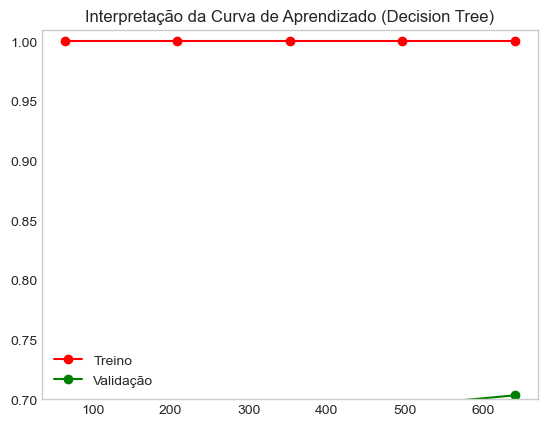

In [16]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

plot_learning_curve(
    title="Interpretação da Curva de Aprendizado (Decision Tree)",
    X=X_train, y=y_train,
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring_metric='accuracy'
)


**Interpretação da curva de aprendizado (Decision Tree)**

**O que o gráfico mostra:**
- **Eixo X:** tamanho do conjunto de treino
- **Eixo Y (accuracy):** de **0.70 a 1.00**
- **Curva vermelha (Treino):** desempenho no **conjunto de treino**, praticamente **1.00 (100%)** em todos os pontos
- **Curva verde (Validação):** desempenho no **conjunto de validação/teste**, em torno de **0.70–0.71 (70–71%)**

**Leitura do “70%”:**
- O valor ~**0.70** na curva verde significa que, em média, o modelo acerta **7 em cada 10** exemplos **fora do treino**
- A diferença grande entre **Treino ≈ 1.00** e **Validação ≈ 0.70** indica **overfitting**: a árvore está **memorizando** o treino (por isso perfeito), mas **não generaliza** bem para dados novos

**Por que isso ocorre?**
- Árvores de decisão sem restrições (por exemplo, `max_depth=None`) tendem a crescer demais, criando regras muito específicas para o treino
- Resultado: **baixa generalização** e **accuracy modesta** em validação

In [17]:
candidates = [
    dict(max_depth=3),
    dict(max_depth=5),
    dict(max_depth=7, min_samples_leaf=5),
    dict(max_depth=7, max_leaf_nodes=20),
    dict(max_depth=None, ccp_alpha=0.01),  # poda por complexidade
]

for params in candidates:
    clf = DecisionTreeClassifier(random_state=42, **params)
    sizes, train_scores, val_scores = learning_curve(
        estimator=clf, X=X_train, y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 8),
        cv=cv, scoring='accuracy', n_jobs=4
    )
    print(params, np.mean(val_scores, axis=1).round(3))


{'max_depth': 3} [0.634 0.664 0.693 0.688 0.693 0.693 0.7   0.706]
{'max_depth': 5} [0.636 0.667 0.684 0.694 0.697 0.701 0.699 0.708]
{'max_depth': 7, 'min_samples_leaf': 5} [0.619 0.647 0.663 0.685 0.689 0.681 0.7   0.702]
{'max_depth': 7, 'max_leaf_nodes': 20} [0.626 0.658 0.677 0.707 0.704 0.699 0.701 0.721]
{'max_depth': None, 'ccp_alpha': 0.01} [0.619 0.652 0.687 0.696 0.699 0.699 0.701 0.711]


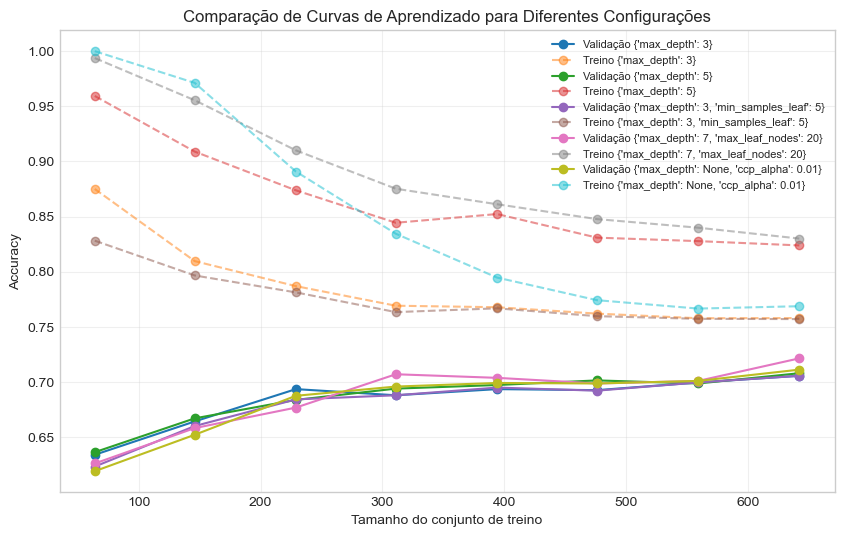

In [18]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

candidates = [
    dict(max_depth=3),
    dict(max_depth=5),
    dict(max_depth=3, min_samples_leaf=5),
    dict(max_depth=7, max_leaf_nodes=20),
    dict(max_depth=None, ccp_alpha=0.01)  # poda por complexidade
]

plt.figure(figsize=(10, 6))

for params in candidates:
    clf = DecisionTreeClassifier(random_state=42, **params)
    sizes, train_scores, val_scores = learning_curve(
        estimator=clf, X=X_train, y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 8),
        cv=cv, scoring='accuracy', n_jobs=4
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    label = f"{params}"
    plt.plot(sizes, val_mean, 'o-', label=f"Validação {label}")
    plt.plot(sizes, train_mean, 'o--', alpha=0.5, label=f"Treino {label}")

plt.title("Comparação de Curvas de Aprendizado para Diferentes Configurações")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Accuracy")
plt.legend(loc="best", fontsize=8)
plt.grid(alpha=0.3)
plt.show()


## **Conclusão da Análise das Curvas de Aprendizado**

Com base na comparação das curvas de treino (pontilhadas) e validação (cheias), apresentamos o resumo de desempenho das configurações testadas:  

---

### **Tabela Comparativa de Modelos**

| **Configuração do Modelo**            | **Representação Visual (Treino / Validação)** | **Desempenho de Validação** | **Grau de Overfitting**       | **Diagnóstico Técnico**                                                                 |
|--------------------------------------|-----------------------------------------------|-----------------------------|--------------------------------|-----------------------------------------------------------------------------------------|
| `max_depth: 3`                      | Laranja (pontilhada) / Azul escuro (cheia)        | Baixo (~0.69)              | Baixo (Baixa Variância)       | **Underfitting:** O modelo é simples demais para capturar a complexidade dos dados    |
| `max_depth: 7, max_leaf_nodes: 20`  | Cinza (pontilhada) / Rosa (cheia)                 | Máximo (~0.72)             | Alto                           | **Melhor Candidato:** Apesar do forte overfitting, é o que entrega a melhor acurácia  |
| `ccp_alpha: 0.01`                   | Ciano (pontilhada) / Oliva (cheia)                | Médio-Alto (~0.71)         | Moderado                       | **Poda Excessiva:** A simplificação via alpha reduziu o overfitting, mas sacrificou acurácia |
| `max_depth: 3, min_samples_leaf: 5` | Marrom (pontilhada) / Marrom (cheia)              | Baixo (~0.69)              | Mínimo                         | **Estável:** Altamente generalista, porém com poder preditivo limitado                |

---

### **Análise de Pontos-Chave**
- **Presença de High Variance (Overfitting):**  
  Observa-se um gap persistente entre as curvas de treino e validação em todos os modelos. O modelo `max_depth: 7` (Linha Cinza/Rosa) demonstra isso claramente: enquanto no treino ele beira a perfeição inicial (1.0), na validação ele estabiliza próximo a 0.72. Isso indica que a árvore está capturando ruídos específicos do conjunto de treino que não se repetem na validação

- **Ponto de Estagnação (Platô):**  
  As curvas de validação começam a apresentar um comportamento de "platô" a partir de 450-500 amostras. Isso sugere que, para este conjunto de atributos (features), adicionar mais dados de treino do mesmo tipo trará ganhos marginais de performance

- **Efeito da Poda (Pruning):**  
  O uso do `ccp_alpha: 0.01` (Linha Oliva) mostrou-se uma técnica eficaz para aproximar as curvas de treino e validação, tornando o modelo mais honesto. No entanto, nesta análise, ele ficou ligeiramente atrás do modelo com `max_depth: 7` em termos de acurácia bruta, indicando que o valor de alpha pode precisar de um ajuste fino (*fine-tuning*)


In [22]:
# Instancia o classificador de Árvore de Decisão
clf = tree.DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)

# Treina o modelo
clf = clf.fit(X_train, y_train)

# Probabilidades previstas para a classe positiva (índice 1)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Classes previstas
y_pred = clf.predict(X_test)

## **Matriz Confusão**

**Versão matplotlib:**

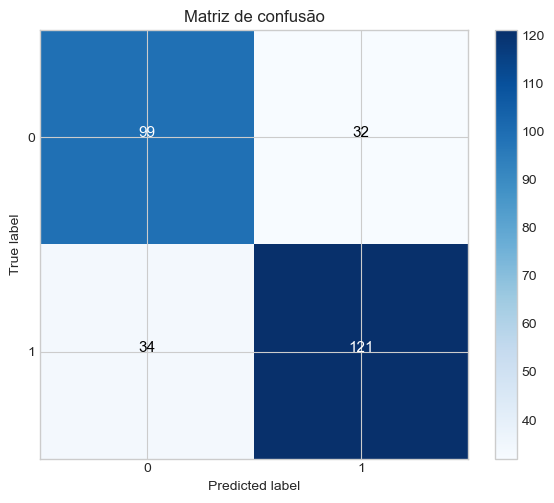

In [25]:
# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes, title='Matriz de confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Preenche os valores nas células
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, format(cm[i, j], 'd'),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black',
                fontsize=11
            )

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot
plot_confusion_matrix(cnf_matrix, classes=[0, 1], title='Matriz de confusão')

**Versão com seaborn:**

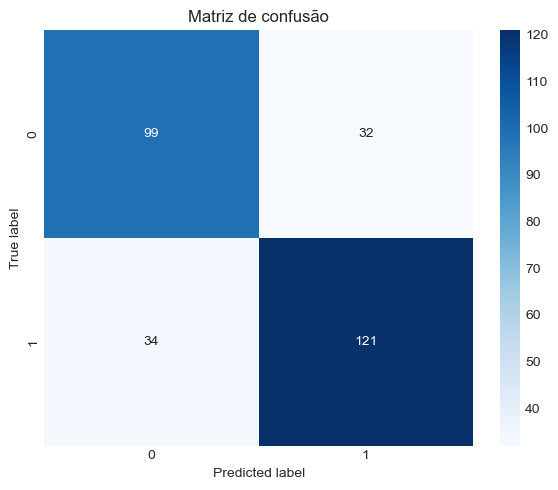

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.title('Matriz de confusão')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


## Interpretação da Matriz de Confusão

A matriz de confusão é uma ferramenta para avaliar o desempenho do modelo de **classificação** usado. Ela compara:

- **Rótulo verdadeiro** (o que realmente é) → eixo vertical (**True label**)
- **Previsão do modelo** (o que ele disse que era) → eixo horizontal (**Predicted label**)

---

**Estrutura da matriz**

|                | **Previsto 0** | **Previsto 1** |
|---------------|---------------|---------------|
| **Real 0**    | 99            | 32            |
| **Real 1**    | 34            | 121           |

- **99** → Casos que eram 0 e o modelo acertou (previu 0) → **True Negative (TN)**  
- **121** → Casos que eram 1 e o modelo acertou (previu 1) → **True Positive (TP)**  
- **32** → Casos que eram 0, mas o modelo errou (previu 1) → **False Positive (FP)**  
- **34** → Casos que eram 1, mas o modelo errou (previu 0) → **False Negative (FN)**  

---

**O que isso significa?**

- **Acertos**: 99 + 121 = **220 casos**
- **Erros**: 32 + 34 = **66 casos**
- **Acurácia**: (TP + TN) / Total = (121 + 99) / 286 ≈ **77%**

---

**Métricas principais (classe positiva = 1)**

- **Precisão (Precision)** = TP / (TP + FP) = 121 / (121 + 32) ≈ **79%**  
  > Entre as previsões de “1”, 79% estavam corretas

- **Recall (Sensibilidade)** = TP / (TP + FN) = 121 / (121 + 34) ≈ **78%**  
  > Entre os casos “1” reais, 78% foram detectados

- **F1-score** ≈ **78,5%**  
  > Combina precisão e recall em uma única métrica

---

**Como interpretar de forma simples?**

- *Quanto maiores os números na diagonal (99 e 121), melhor*
- *Quanto menores os números fora da diagonal (32 e 34), melhor*

### Avaliação do Modelo com Métricas de Desempenho

Após visualizar a **matriz de confusão**, é importante calcular métricas que resumem a performance do modelo.  
Essas métricas ajudam a entender não apenas os acertos e erros, mas também a qualidade das previsões para cada classe.

As principais métricas são:
- **Acurácia**: Percentual total de acertos
- **Precisão (Precision)**: Entre as previsões positivas, quantas estavam corretas
- **Recall (Sensibilidade)**: Entre os casos positivos reais, quantos foram detectados
- **F1-score**: Combina precisão e recall em uma única métrica
- **Relatório detalhado**: Mostra métricas por classe

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nDetalhado:\n", classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693
Precision: 0.7908496732026143
Recall: 0.7806451612903226
F1-score: 0.7857142857142857

Detalhado:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       131
           1       0.79      0.78      0.79       155

    accuracy                           0.77       286
   macro avg       0.77      0.77      0.77       286
weighted avg       0.77      0.77      0.77       286



### **Resumo dos resultados**

*   **Acurácia**: `0.769` → O modelo acertou cerca de **77%** das previsões
*   **Precisão (classe 1)**: `0.7908` → Quando o modelo disse que era **classe 1**, acertou **79%** das vezes
*   **Recall (classe 1)**: `0.7806` → Entre os casos que realmente eram **classe 1**, o modelo encontrou **78%**
*   **F1-score (classe 1)**: `0.7857` → Combinação equilibrada entre precisão e recall

***

**Relatório detalhado por classe**

| Classe | Precision | Recall | F1-score | Support |
| ------ | --------- | ------ | -------- | ------- |
| **0**  | 0.74      | 0.76   | 0.75     | 131     |
| **1**  | 0.79      | 0.78   | 0.79     | 155     |

*   **Classe 0**: desempenho um pouco menor (Precision 74%, Recall 76%)
*   **Classe 1**: desempenho melhor (Precision 79%, Recall 78%), indicando que o modelo está ligeiramente mais eficiente para detectar a classe positiva

***

**Considerações importantes**

1.  **Modelo equilibrado**: As métricas para as duas classes são próximas, sem grande viés
2.  **Bom ponto de partida**: Acurácia de \~77% é razoável, mas pode ser melhorada
3.  **Trade-off Precision vs Recall**:
    *   Para classe 1, **Precision (79%) > Recall (78%)**, ou seja, o modelo é um pouco mais conservador (menos falsos positivos)
4.  **Impacto no negócio**:
    *   Se **classe 1** é crítica (ex.: cliente que vai cancelar), talvez seja melhor aumentar o **Recall** (mesmo que caia a precisão), para não perder casos importantes
    *   Se **classe 0** é crítica (ex.: evitar custo com falsos alarmes), manter ou aumentar a **Precisão** é prioridade

***

### **Como interpretar a Curva ROC e o AUC**

A **Curva ROC (Receiver Operating Characteristic)** é uma ferramenta para avaliar a capacidade de um modelo de classificação em separar as classes. Ela mostra a relação entre:

- **Eixo X (False Positive Rate)**: Taxa de falsos positivos (quanto o modelo erra ao prever a classe positiva)
- **Eixo Y (True Positive Rate)**: Taxa de verdadeiros positivos (Recall)

Cada ponto da curva representa um **limiar de decisão** diferente. Ajustar esse limiar muda o equilíbrio entre **Precision** e **Recall**.

---

**O que é AUC?**
- **AUC (Área sob a curva)** é um número entre 0 e 1 que resume a performance do modelo:
  - **AUC = 0.5** → Modelo aleatório (sem poder de discriminação)
  - **AUC = 1.0** → Modelo perfeito
  - **AUC > 0.8** → Modelo muito bom
  - **AUC entre 0.7 e 0.8** → Modelo aceitável
  - **AUC < 0.7** → Modelo precisa de melhorias

---


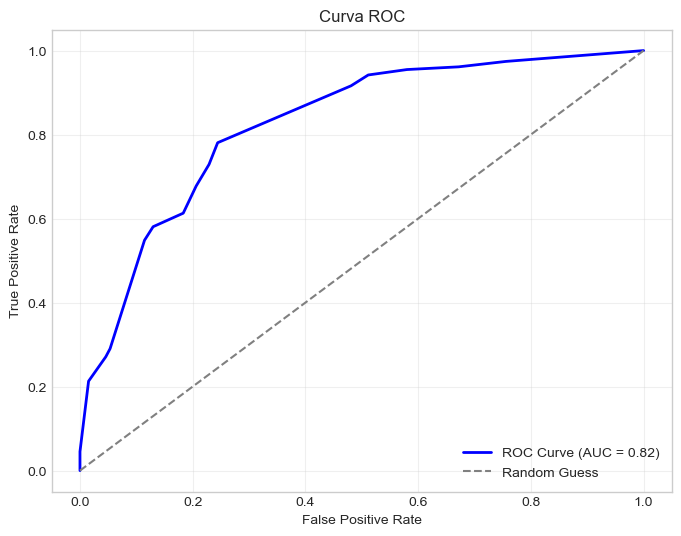

In [31]:
# Probabilidades previstas para a classe positiva
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calcula pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcula AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plota a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### **Avaliação do Modelo (Wine Quality) — com classes: positivo = {6,7,8}, negativo = < 6**

**1) Definição das classes**
- **Classe 1 (positivo)**: vinho de **boa/aceitável qualidade** → `quality ∈ {6, 7, 8}`
- **Classe 0 (negativo)**: vinho de **qualidade média/baixa** → `quality < 6`

**2) O que significam TP, FP, TN, FN neste contexto?**
- **TP (True Positive)**: modelo previu **“bom/aceitável”** e o vinho realmente é 6/7/8  
- **FP (False Positive)**: modelo previu **“bom/aceitável”**, mas o vinho é `< 6` (falso alarme)  
- **TN (True Negative)**: modelo previu **“médio/ruim”** e o vinho realmente é `< 6`  
- **FN (False Negative)**: modelo previu **“médio/ruim”**, mas o vinho é **6/7/8** (perda de um bom/aceitável)  

**Impacto prático**  
- **FP**: posicionar como bom um vinho que é `< 6` → pode gerar **custo** e **insatisfação**  
- **FN**: deixar de tratar como bom um vinho que é 6/7/8 → **perda de oportunidade** de margem/posicionamento  

---

### **3) Curva ROC e AUC (observado: AUC ≈ 0.82)**
- **AUC ≈ 0.82** indica **boa capacidade de discriminação** entre vinhos `≥ 6` e `< 6`
